In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('loantrain.csv')
test = pd.read_csv('loantest.csv')

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
print(train.describe(include=np.object))
print('\n:',train.describe())

         Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001585   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   

       Property_Area Loan_Status  
count            614         614  
unique             3           2  
top        Semiurban           Y  
freq             233         422  

:        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.50000

In [9]:
#we see that the credit history is 0 or 1 so we will change the dtype to object

train['Credit_History'] = train['Credit_History'].astype('O')

In [10]:
train.duplicated().any()

False

the percentage of Y class: 0.69

the percentage of N class: 0.31


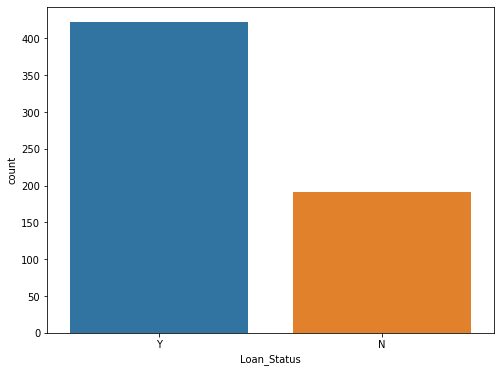

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(train['Loan_Status'])

print('the percentage of Y class: %.2f'% (train['Loan_Status'].value_counts()[0]/len(train)))
print('\nthe percentage of N class: %.2f'%(train['Loan_Status'].value_counts()[1]/len(train)))

In [12]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

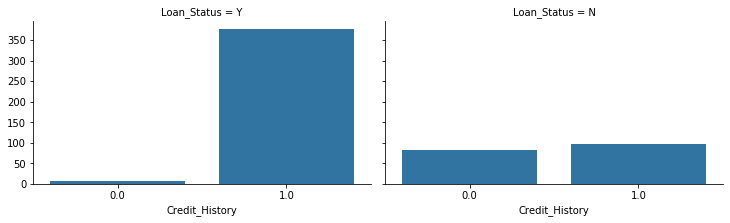

In [13]:
#credit_history

grid = sns.FacetGrid(train, col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')

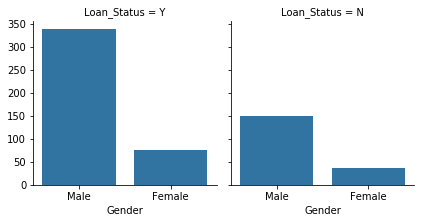

In [14]:
#gender

grid = sns.FacetGrid(train, col='Loan_Status', size=3.2, aspect=.93)
grid.map(sns.countplot, 'Gender')#good feature because of their varience between the both*

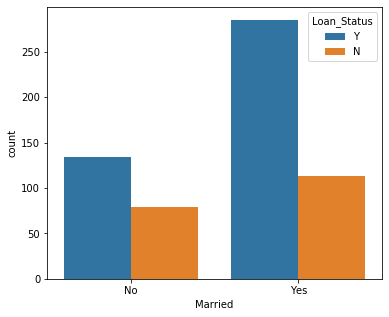

In [15]:
#married
plt.figure(figsize=(6,5))

sns.countplot(x='Married', hue='Loan_Status', data=train)

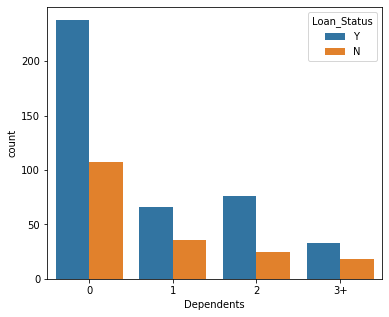

In [16]:
#dependants
plt.figure(figsize=(6,5))

sns.countplot(x='Dependents', hue='Loan_Status', data=train)

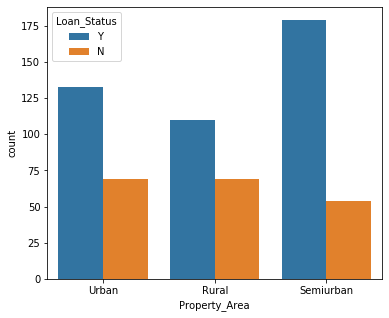

In [17]:
plt.figure(figsize=(6,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=train)

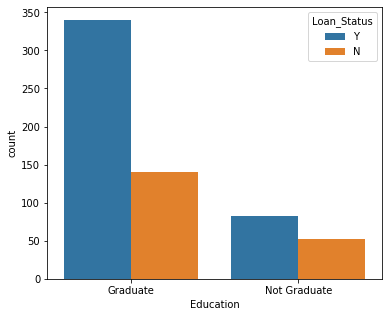

In [18]:
plt.figure(figsize=(6,5))
sns.countplot(x='Education', hue='Loan_Status', data=train)

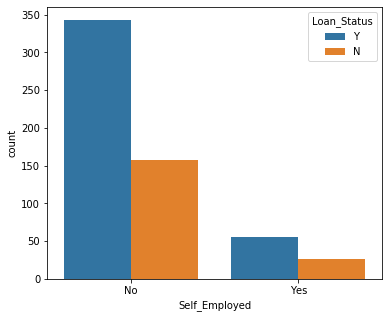

In [19]:
plt.figure(figsize=(6,5))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=train)

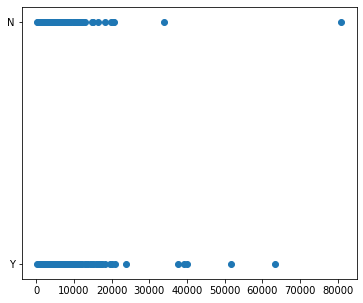

In [20]:
plt.figure(figsize=(6,5))
plt.scatter(x=train['ApplicantIncome'],y=train['Loan_Status'])

In [21]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

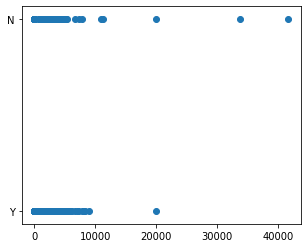

In [22]:
plt.figure(figsize=(5,4))
plt.scatter(x=train['CoapplicantIncome'],y=train['Loan_Status'])

In [23]:
#numerical data

train.groupby(by=['Loan_Status']).median()#because it not affected by outliers

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


In [24]:
#percentage of missing values in each data varibles

total_miss = train.isnull().sum()
perc_miss = total_miss/train.isnull().count()*100

missing_data = pd.DataFrame({'training_miss':total_miss, 'percentage':perc_miss})
missing_data.sort_values(by='training_miss', ascending=False)

,training_miss,percentage
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [25]:
total_miss = test.isnull().sum()
perc_miss = total_miss/test.isnull().count()*100

missing_data = pd.DataFrame({'test_miss':total_miss, 'percentage':perc_miss})
missing_data.sort_values(by='test_miss', ascending=False)

,test_miss,percentage
Credit_History,29,7.901907
Self_Employed,23,6.267030
Gender,11,2.997275
Dependents,10,2.724796
Loan_Amount_Term,6,1.634877
LoanAmount,5,1.362398
Loan_ID,0,0.000000
Married,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [26]:
#separating the different categories

num_data = []
cat_data = []
for i,c in enumerate(train.dtypes):
    if c == np.object:
        cat_data.append(train.iloc[:,i])
    else:
        num_data.append(train.iloc[:,i])

In [27]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [28]:
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,Y


In [29]:
cat_data.drop('Loan_ID',axis=1, inplace=True)

In [30]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [31]:
cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))# filling nan with the highest values(must frequent)
cat_data.isnull().sum().any()

False

In [32]:
num_data = num_data.fillna(method='bfill',axis=0)
num_data.isnull().sum().any()

False

In [33]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

In [34]:
target_values = {'Y': 0, 'N': 1}
target = cat_data['Loan_Status']
cat_data.drop(['Loan_Status'], axis=1,inplace=True)

target = target.map(target_values)

In [35]:
#transform all categorical features
for i in cat_data:
    cat_data[i] = lb.fit_transform(cat_data[i])

In [36]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,1,0,0,1,0
1,1,1,0,0,0,1,1
2,1,1,1,0,1,1,0
3,1,1,1,1,0,1,0
4,1,0,1,0,0,1,0


In [37]:
train = pd.concat([cat_data, num_data, target], axis=1)

In [39]:
train.head(20)

# Train the data:

**we want to train the data using stratified shuffle split** 

In [105]:
x = pd.concat([cat_data, num_data],axis=1)
y = target

In [106]:
#why we use stratified shuffle split is to shuffle them together with the target

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in sss.split(x,y):
    x_train,x_test = x.iloc[train],x.iloc[test]
    y_train,y_test = y.iloc[train],y.iloc[test]
    
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (491, 11)
x_test shape: (123, 11)
y_train shape: (491,)
y_test shape: (123,)


In [107]:
#checking the ratio of the target
print('ratio of the target to y_train:', y_train.value_counts().values/len(y_train))
print('ratio of the target to y_test:', y_test.value_counts().values/len(y_test))
print('ratio of the target to the original dataset:', y.value_counts().values/len(y))

ratio of the target to y_train: [0.68635438 0.31364562]
ratio of the target to y_test: [0.69105691 0.30894309]
ratio of the target to the original dataset: [0.68729642 0.31270358]


In [108]:
#training using 4 models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    'LogisticReg:': LogisticRegression(random_state=42),
    'RandomForestClassifier:' : RandomForestClassifier(random_state=42, criterion='gini', max_depth=1),
    'KNN:': KNeighborsClassifier(n_neighbors=5),
    'SupportVectorMachine:': SVC(random_state=42)
}

In [109]:
#using f2_score,recall,percision, log_loss and accuracy for metrics

from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score,log_loss

def measure_loss(y_true, y_pred, retu=False):
    prec = precision_score(y_true,y_pred)
    recal = recall_score(y_true,y_pred)
    f1_sco = f1_score(y_true,y_pred)
    acc = accuracy_score(y_true,y_pred)
    loss = log_loss(y_true,y_pred)
    
    if retu:
        return prec,recal,f1_sco,acc,loss
    else:
        print('precision: %.3f \nrecall: %.3f \nf1_scores: %.3f \naccuracy: %.3f \nloss: %.3f' \
              %(prec,recal,f1_sco,acc,loss))

In [110]:
#we now want to evaluate the train_split

def train_eval(models, X, Y):
    for name,model in models.items():
        print(name)
        model.fit(X, Y)
        measure_loss(Y,model.predict(X))
        print('-'*30)
        
train_eval(models, x_train, y_train)
#we see that logistic regression is the best model for now, next to knn.

LogisticReg:
precision: 0.917 
recall: 0.429 
f1_scores: 0.584 
accuracy: 0.809 
loss: 6.612
------------------------------
RandomForestClassifier:
precision: 1.000 
recall: 0.013 
f1_scores: 0.026 
accuracy: 0.690 
loss: 10.692
------------------------------
KNN:
precision: 0.667 
recall: 0.364 
f1_scores: 0.471 
accuracy: 0.743 
loss: 8.863
------------------------------
SupportVectorMachine:
precision: 1.000 
recall: 0.013 
f1_scores: 0.026 
accuracy: 0.690 
loss: 10.692
------------------------------


In [111]:
x_train.shape

(491, 11)

In [112]:
#we want to evaluate. This train_eval_cross will be well explained in the next cell.

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(random_state=42,n_splits=10,shuffle=True)

def train_eval_cross(models, X, Y, folds):
    #we want to change X,Y to dataframe, to access iloc(because iloc can't work with np.array)
    X = pd.DataFrame(X)
    Y = pd.DataFrame(Y)
    idx = ['precision', 'recall', 'f1_score', 'accuracy', 'loss']
    
    for name,model in models.items():
        ls = []
        print('_'*22)
        print(name)
        print('_'*22)
        for train,test in folds.split(X, Y):
            model.fit(X.iloc[train], Y.iloc[train])
            y_pred = model.predict(X.iloc[test])
            ls.append(measure_loss(Y.iloc[test], y_pred, retu=True))   
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])
        
train_eval_cross(models, x_train, y_train, skf)
#logistic regression is till the best, and svm is till memorizing.

______________________
LogisticReg:
______________________
precision    0.894048
recall       0.441250
f1_score     0.584205
accuracy     0.810612
loss         6.541233
Name: 0, dtype: float64
______________________
RandomForestClassifier:
______________________
precision     0.200000
recall        0.013333
f1_score      0.025000
accuracy      0.690449
loss         10.691513
Name: 0, dtype: float64
______________________
KNN:
______________________
precision     0.379834
recall        0.207500
f1_score      0.259954
accuracy      0.641510
loss         12.381887
Name: 0, dtype: float64
______________________
SupportVectorMachine:
______________________
precision     0.000000
recall        0.000000
f1_score      0.000000
accuracy      0.680245
loss         11.043955
Name: 0, dtype: float64


In [113]:
#for a single model,and the explanation of the train_eval_cross.

x=[]
idx = ['precision','recall','f1_score', 'accuracy', 'loss']

lg = LogisticRegression()

for train, test in skf.split(x_train,y_train):
    lg.fit(x_train.iloc[train], y_train.iloc[train])
    ls = measure_loss(y_train.iloc[test], lg.predict(x_train.iloc[test]), retu=True)
    x.append(ls)
    
#And this is the result 
pd.DataFrame(x, columns=idx)
#(columns 0 are the precision_score for logistic regression in the 10folds evaluation)
#(the row 0 are the (precision, recall, f1_score, accuracy, loss) of the first fold evaluation)

#To find the mean of every scores
#mean = pd.DataFrame(x, columns=idx).mean()
#print(mean)

,precision,recall,f1_score,accuracy,loss
0,0.875000,0.437500,0.583333,0.800000,6.907771
1,0.833333,0.333333,0.476190,0.775510,7.753619
2,0.875000,0.466667,0.608696,0.816327,6.343873
3,0.500000,0.200000,0.285714,0.693878,10.573144
4,1.000000,0.466667,0.636364,0.836735,5.638984
5,0.857143,0.400000,0.545455,0.795918,7.048746
6,1.000000,0.733333,0.846154,0.918367,2.819492
7,1.000000,0.625000,0.769231,0.877551,4.229238
8,1.000000,0.375000,0.545455,0.795918,7.048730
9,1.000000,0.375000,0.545455,0.795918,7.048730


## Let's improve our model.

# Feature Engineering.

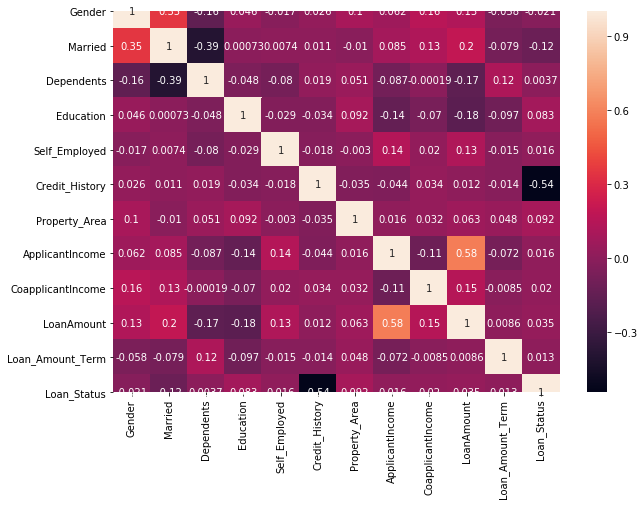

In [114]:
data_corr = pd.concat([x_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)

#we see that the dependents. married, credit_History appears to be a good feature, actually credict_history seem to be the best
#feature.
#WE also see that loanAmount and applicantIncome have 58% similarity and this may lead to bad model.

In [115]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
415,0,0,1,0,0,1,0,2995.0,0.0,60.0,360.0
26,1,1,1,0,0,1,0,2799.0,2253.0,122.0,360.0
394,1,1,0,0,0,1,0,3100.0,1400.0,113.0,360.0
584,1,1,0,0,0,0,1,2787.0,1917.0,146.0,360.0
86,1,1,0,1,0,1,0,3333.0,2000.0,99.0,360.0


In [116]:
#here come the feature engineering

x_train['New_col'] = x_train['CoapplicantIncome'] / x_train['ApplicantIncome']
x_train['New_col_1'] = x_train['LoanAmount'] * x_train['Loan_Amount_Term']
x_train['New_col_2'] = x_train['CoapplicantIncome'] - x_train['ApplicantIncome']


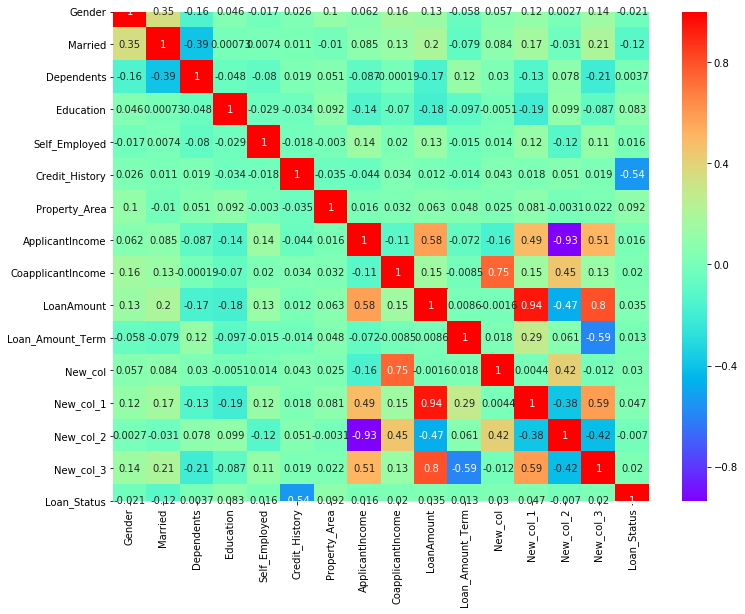

In [117]:
#let's check their correlation again.

data_corr = pd.concat([x_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True, cmap='rainbow')

In [118]:
x_train.drop(['LoanAmount', 'CoapplicantIncome'], axis=1, inplace=True)

In [119]:
train_eval_cross(models, x_train, y_train, skf)

#here we see that our svm is overfitting and logistic regression has high accuracy

______________________
LogisticReg:
______________________
precision    0.245714
recall       0.116250
f1_score     0.156545
accuracy     0.716980
loss         9.775183
Name: 0, dtype: float64
______________________
RandomForestClassifier:
______________________
precision     0.200000
recall        0.020000
f1_score      0.036029
accuracy      0.692490
loss         10.621026
Name: 0, dtype: float64
______________________
KNN:
______________________
precision     0.275155
recall        0.175417
f1_score      0.210686
accuracy      0.612816
loss         13.372953
Name: 0, dtype: float64
______________________
SupportVectorMachine:
______________________
precision     0.000000
recall        0.000000
f1_score      0.000000
accuracy      0.686367
loss         10.832488
Name: 0, dtype: float64


In [120]:
#Taking a look at the value_counts 

for i in range(x_train.shape[1]):
    print(x_train.iloc[:,i].value_counts(), end='\n--------------\n')

1    398
0     93
Name: Gender, dtype: int64
--------------
1    315
0    176
Name: Married, dtype: int64
--------------
1    292
0    199
Name: Dependents, dtype: int64
--------------
0    382
1    109
Name: Education, dtype: int64
--------------
0    428
1     63
Name: Self_Employed, dtype: int64
--------------
1    421
0     70
Name: Credit_History, dtype: int64
--------------
0    349
1    142
Name: Property_Area, dtype: int64
--------------
2500.0    8
3750.0    5
3333.0    5
2600.0    5
4166.0    5
         ..
5780.0    1
3676.0    1
2281.0    1
1538.0    1
3100.0    1
Name: ApplicantIncome, Length: 410, dtype: int64
--------------
360.0    426
180.0     37
480.0      8
300.0      8
84.0       3
240.0      3
60.0       2
36.0       2
120.0      2
Name: Loan_Amount_Term, dtype: int64
--------------
0.000000    222
0.414374      1
0.912892      1
1.258120      1
0.504299      1
           ... 
0.330420      1
2.332134      1
0.844471      1
0.564642      1
0.824769      1
Name: New

Text(0.5, 1.0, 'New_col_1_after log')

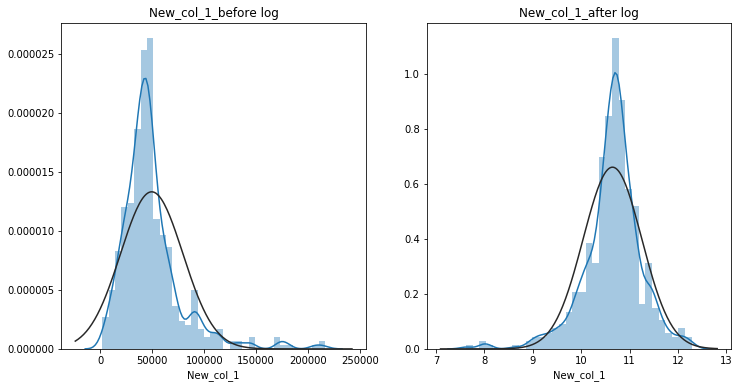

In [121]:
#working on the features we've varied.

from scipy.stats import norm

fig, ax = plt.subplots(1,2, figsize=(12,6))

sns.distplot(x_train['New_col_1'], ax=ax[0], fit=norm)
ax[0].set_title('New_col_1_before log')

x_train['New_col_1'] = np.log(x_train['New_col_1']) #logarithm of all the values

sns.distplot(x_train['New_col_1'], ax=ax[1], fit=norm)
ax[1].set_title('New_col_1_after log')

In [103]:
#x_train.drop(['New_col_2'], axis=1, inplace=True)

In [122]:
train_eval_cross(models, x_train, y_train, skf)

______________________
LogisticReg:
______________________
precision    0.836706
recall       0.448333
f1_score     0.572487
accuracy     0.800490
loss         6.890859
Name: 0, dtype: float64
______________________
RandomForestClassifier:
______________________
precision     0.200000
recall        0.020000
f1_score      0.036029
accuracy      0.692490
loss         10.621026
Name: 0, dtype: float64
______________________
KNN:
______________________
precision     0.423950
recall        0.213750
f1_score      0.279113
accuracy      0.657755
loss         11.820797
Name: 0, dtype: float64
______________________
SupportVectorMachine:
______________________
precision     0.000000
recall        0.000000
f1_score      0.000000
accuracy      0.684327
loss         10.902977
Name: 0, dtype: float64


In [124]:
print('Before:')
print(x_train['New_col'].value_counts())

x_train['New_col'] = [x if x==0 else 1 for x in x_train['New_col']]
print('_'*22)
print('After:')
print(x_train['New_col'].value_counts())

Before:
0.000000    222
0.414374      1
0.912892      1
1.258120      1
0.504299      1
           ... 
0.330420      1
2.332134      1
0.844471      1
0.564642      1
0.824769      1
Name: New_col, Length: 270, dtype: int64
______________________
After:
1.0    269
0.0    222
Name: New_col, dtype: int64


In [132]:
x_train['New_col_2'] = 1000 - x_train['New_col_2']

In [136]:
train_eval_cross(models, x_train, y_train, skf)

______________________
LogisticReg:
______________________
precision    0.704798
recall       0.370833
f1_score     0.477069
accuracy     0.788408
loss         7.308135
Name: 0, dtype: float64
______________________
RandomForestClassifier:
______________________
precision     0.200000
recall        0.020000
f1_score      0.036029
accuracy      0.690449
loss         10.691515
Name: 0, dtype: float64
______________________
KNN:
______________________
precision     0.423950
recall        0.213750
f1_score      0.279113
accuracy      0.657755
loss         11.820797
Name: 0, dtype: float64
______________________
SupportVectorMachine:
______________________
precision     0.000000
recall        0.000000
f1_score      0.000000
accuracy      0.684327
loss         10.902977
Name: 0, dtype: float64


In [143]:
x_train.drop(['New_col_3'], axis=1, inplace=True)

In [145]:
for i in range(x_train.shape[1]):
    print(x_train.iloc[:,i].value_counts(), end= '\n-------------\n')
    


1    398
0     93
Name: Gender, dtype: int64
-------------
1    315
0    176
Name: Married, dtype: int64
-------------
1    292
0    199
Name: Dependents, dtype: int64
-------------
0    382
1    109
Name: Education, dtype: int64
-------------
0    428
1     63
Name: Self_Employed, dtype: int64
-------------
1    421
0     70
Name: Credit_History, dtype: int64
-------------
0    349
1    142
Name: Property_Area, dtype: int64
-------------
2500.0    8
3750.0    5
3333.0    5
2600.0    5
4166.0    5
         ..
5780.0    1
3676.0    1
2281.0    1
1538.0    1
3100.0    1
Name: ApplicantIncome, Length: 410, dtype: int64
-------------
360.0    426
180.0     37
480.0      8
300.0      8
84.0       3
240.0      3
60.0       2
36.0       2
120.0      2
Name: Loan_Amount_Term, dtype: int64
-------------
1.0    269
0.0    222
Name: New_col, dtype: int64
-------------
10.673596    18
10.586584    13
10.491274    11
10.961278    11
10.738134     9
             ..
10.085809     1
9.736252      1
11

# Outliers

Text(0.5, 0, ' ')

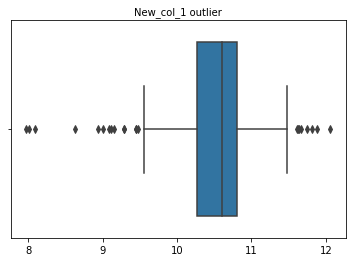

In [193]:
sns.boxplot(x_train['New_col_1'])
plt.title('New_col_1 outlier', fontsize=10)
plt.xlabel(' ')

In [192]:
threshold = 0.003 #this number is a hyper parameter, and the default is always 1.5

new_col_1_out = x_train['New_col_1']
q25, q75 = np.percentile(new_col_1_out, 25), np.percentile(new_col_1_out, 75)
print('25 Quartile is {} and 75 Quartile is {}'.format(q25,q75))

IQR = q75 - q25
print('\nIQR:', IQR)

cut = IQR * threshold
lower, upper = q25 - cut, q75 + cut
print('\nCut_Out:', cut)
print('\nLower:', lower)
print('\nUpper:', upper)

outliers = [x for x in new_col_1_out if x < lower or x > upper]
print('\nNumbers of outliers:', len(outliers))
print('\nOutliers:',outliers)

data_outliers = pd.concat([x_train, y_train], axis=1)
print('\nLength of x_train outliers before removing:', len(data_outliers))

data_outliers = data_outliers.drop(data_outliers[(data_outliers['New_col_1'] > upper) | (data_outliers['New_col_1'] < lower)].index)
print('\nLength of x_train outliers after removed:', len(data_outliers))

25 Quartile is 10.268130666124037 and 75 Quartile is 10.798758917186207

IQR: 0.5306282510621703

Cut_Out: 0.0015918847531865108

Lower: 10.266538781370851

Upper: 10.800350801939393

Numbers of outliers: 144

Outliers: [9.980448593672257, 10.869710653158492, 10.09823162932864, 10.961277846683982, 11.62589694362939, 10.083305979111964, 11.473352689850405, 10.14878390849147, 10.855917331026156, 10.190169124654325, 10.82774645405946, 10.855917331026156, 8.930626469173578, 11.184421397998193, 10.16277015046621, 11.153962190513484, 9.878169744551839, 11.010068010853415, 11.117212648304742, 11.237962164926222, 9.980448593672257, 9.963641475355875, 10.961277846683982, 10.923056633863785, 7.965545573129992, 10.216837371736487, 10.075758773476581, 11.05089000537367, 9.93788897925346, 9.578311275656766, 10.890050337395614, 11.039395625947934, 10.88331630521427, 11.349935836475765, 11.61620381442373, 9.587406005562649, 11.111850705163357, 10.90338386826508, 9.112948025967533, 11.021902468500418,

Text(0.5, 0, ' ')

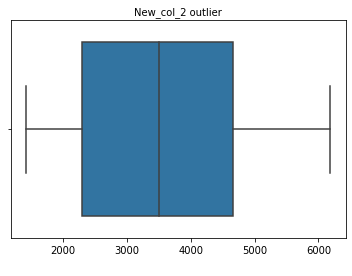

In [189]:
sns.boxplot(x_train['New_col_2'])
plt.title('New_col_2 outlier', fontsize=10)
plt.xlabel(' ')

In [178]:
thershold = 0.1

new_col_2_out = x_train['New_col_2']
q25, q75 = np.percentile(new_col_2_out, 25), np.percentile(new_col_2_out, 75)
print('25 Quartile is', q25, 'and 75 Quartile is', q75)

IQR = q75 - q25
print('\nIQR:', IQR)

cut = IQR * thershold
lower, upper = q25 - cut, cut + q75
outliers = [x for x in new_col_2_out if x < lower or x > upper]
print('\nCut_out:', cut)
print('\nLower:', lower)
print('\nUpper:', upper)
print('\nTotal Outliers:',len(outliers))
print('\nOutliers:', outliers)

data_outliers = pd.concat([x_train, y_train], axis=1)
print('\ndata before', len(data_outliers))

data_outliers = data_outliers.drop(data_outliers[(data_outliers['New_col_2'] < lower) | (data_outliers['New_col_2']> upper)].index)
print('\nand data after removed', len(data_outliers))

25 Quartile is 1816.5 and 75 Quartile is 5821.5

IQR: 4005.0

Cut_out: 400.5

Lower: 1416.0

Upper: 6222.0

Total Outliers: 196

Outliers: [0.0, 17666.0, 13000.0, 1101.0, 6746.0, 6250.0, -252.0, 106.0, 7875.0, 1017.0, 7663.0, 6935.0, 522.0, 1213.0, 9333.0, 16000.0, 10504.0, 21667.0, 8740.0, 1245.0, 1117.0, 1399.0, 17692.0, 7250.0, 11416.0, -42.0, 10500.0, 15999.0, 10166.0, -1707.0, 52763.0, 11750.0, 10328.0, -2750.0, 14262.0, 13.0, 11047.0, 1075.0, 11291.0, 1225.0, 10560.0, -5843.0, 15417.0, 6830.0, -2147.0, 6821.0, 1152.0, 12146.0, 150.0, 1220.0, 16759.0, -400.0, 15880.0, -1100.0, 205.0, 17250.0, 1200.0, 89.0, 874.0, 1085.0, 7783.0, 7633.0, 1102.0, 9000.0, -3475.0, 1181.0, 1113.0, 10703.0, 40999.0, 10963.0, 550.0, 1083.0, 15166.0, 8167.0, -67.0, 15583.0, 10323.0, 7256.0, -2625.0, 7033.0, 1142.0, -3622.0, 1058.0, 542.0, -4033.0, 7000.0, 6391.0, 7216.0, 16511.0, 0.0, 1100.0, -748.0, 7045.0, -3536.0, 851.0, 8085.0, 9799.0, 1182.0, 34846.0, 6649.0, 8441.0, 8660.0, 1038.0, 8100.0, -16500.0

In [194]:
data_outliers

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,Loan_Amount_Term,New_col,New_col_1,New_col_2,Loan_Status
26,1,1,1,0,0,1,0,2799.0,360.0,1.0,10.690125,1546.0,0
394,1,1,0,0,0,1,0,3100.0,360.0,1.0,10.613492,2700.0,0
86,1,1,0,1,0,1,0,3333.0,360.0,1.0,10.481224,2333.0,0
136,0,1,1,0,0,1,1,4583.0,360.0,0.0,10.316921,5583.0,1
45,0,0,1,0,0,1,0,3410.0,360.0,0.0,10.363441,4410.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,0,0,1,0,0,1,0,3086.0,360.0,0.0,10.673596,4086.0,0
398,1,0,1,1,0,1,1,3902.0,360.0,1.0,10.577452,3236.0,0
507,1,0,1,0,0,1,0,3583.0,360.0,0.0,10.450452,4583.0,1
386,1,0,1,1,0,1,0,2346.0,360.0,1.0,10.768906,1746.0,0


In [195]:
x_train = data_outliers.drop(['Loan_Status'], axis=1)
y_train = data_outliers['Loan_Status']

Text(0.5, 0, '')

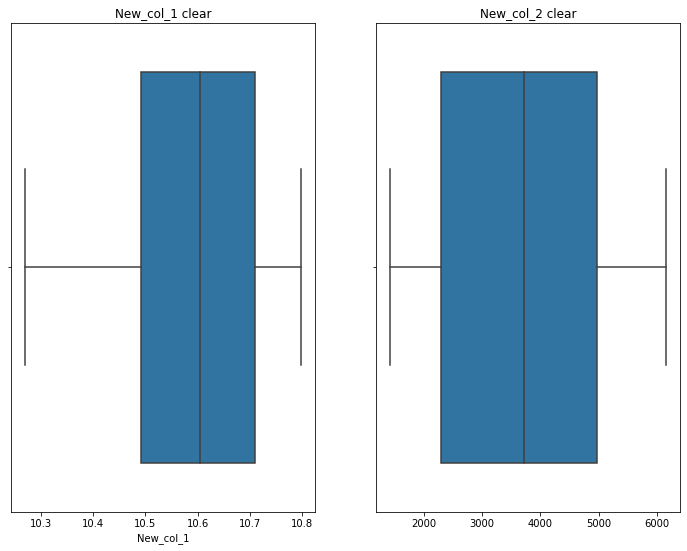

In [196]:
fig, ax = plt.subplots(1,2, figsize=(12,9))

sns.boxplot(x_train['New_col_1'], ax=ax[0])
ax[0].set_title('New_col_1 clear', fontsize=12)
plt.xlabel('')

sns.boxplot(x_train['New_col_2'], ax=ax[1])
ax[1].set_title('New_col_2 clear', fontsize=12)
plt.xlabel('')

In [197]:
train_eval_cross(models, x_train, y_train, skf)

______________________
LogisticReg:
______________________
precision    0.966667
recall       0.565000
f1_score     0.671457
accuracy     0.853750
loss         5.051307
Name: 0, dtype: float64
______________________
RandomForestClassifier:
______________________
precision    0.475000
recall       0.245000
f1_score     0.303889
accuracy     0.760833
loss         8.260529
Name: 0, dtype: float64
______________________
KNN:
______________________
precision     0.396190
recall        0.320000
f1_score      0.342006
accuracy      0.648333
loss         12.146248
Name: 0, dtype: float64
______________________
SupportVectorMachine:
______________________
precision     0.000000
recall        0.000000
f1_score      0.000000
accuracy      0.688750
loss         10.750194
Name: 0, dtype: float64


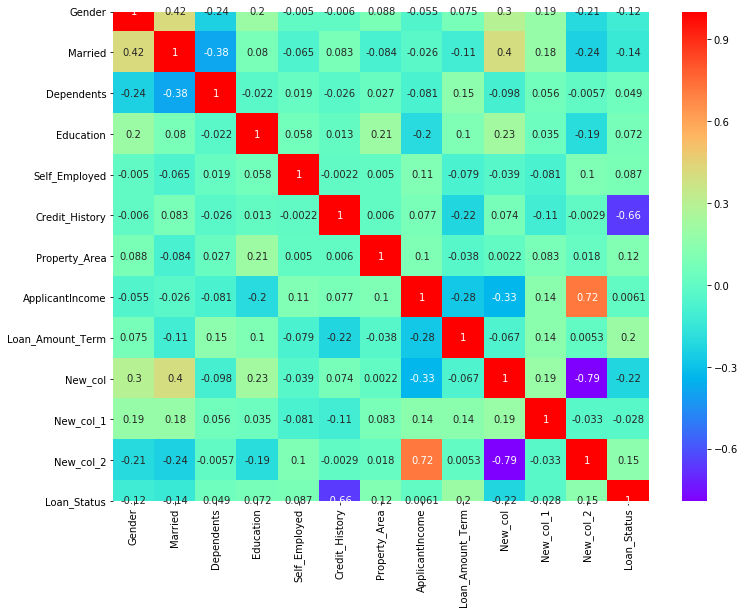

In [200]:
data_corr = pd.concat([x_train, y_train],axis=1)
corr = data_corr.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True, cmap='rainbow')

In [201]:
x_train.drop(['Gender', 'Married','Dependents','Education', 'Self_Employed', 'Property_Area', 'ApplicantIncome', 'New_col', 'New_col_1', 'New_col_2'], axis=1, inplace=True)

In [202]:
train_eval_cross(models,x_train,y_train,skf)

______________________
LogisticReg:
______________________
precision    0.980000
recall       0.540000
f1_score     0.661984
accuracy     0.853750
loss         5.051301
Name: 0, dtype: float64
______________________
RandomForestClassifier:
______________________
precision    0.980000
recall       0.565000
f1_score     0.688651
accuracy     0.860417
loss         4.821043
Name: 0, dtype: float64
______________________
KNN:
______________________
precision    0.980000
recall       0.565000
f1_score     0.688651
accuracy     0.860417
loss         4.821043
Name: 0, dtype: float64
______________________
SupportVectorMachine:
______________________
precision    0.400000
recall       0.090000
f1_score     0.146667
accuracy     0.715000
loss         9.843551
Name: 0, dtype: float64


# evaluating the test data


In [241]:
x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,New_col,New_col_1,New_col_2,Loan_Status
182,1,1,1,0,0,1,0,4600.0,0.0,73.0,180.0,0.0,9.483416,5600.0,0
276,1,1,1,0,0,1,0,3993.0,3274.0,207.0,360.0,1.0,11.218823,1719.0,0
504,1,1,1,1,0,1,0,3814.0,1483.0,124.0,300.0,1.0,10.524064,3331.0,0
57,1,1,1,0,0,1,1,3366.0,2200.0,135.0,360.0,1.0,10.791379,2166.0,1
259,1,1,0,1,0,1,0,4931.0,0.0,128.0,360.0,0.0,10.738134,5931.0,1


In [210]:
x_test['New_col'] = x_test['CoapplicantIncome'] / x_test['ApplicantIncome']
x_test['New_col_1'] = x_test['LoanAmount'] * x_test['Loan_Amount_Term']
x_test['New_col_2'] = x_test['CoapplicantIncome'] - x_test['ApplicantIncome']


x_test.drop(['New_col_3'], axis=1, inplace=True)
x_test['New_col_2'] = 1000 - x_test['New_col_2']
x_test['New_col_1'] = np.log(x_test['New_col_1'])
x_test['New_col'] = [x if x==0 else 1 for x in x_test['New_col']]

In [258]:
x_test.drop(['LoanAmount', 'CoapplicantIncome'], axis=1, inplace=True)

In [251]:
threshold = 1.0

test_out = x_test['New_col_2']
q25, q75 = np.percentile(test_out, 25), np.percentile(test_out, 75)

iqr = q75 - q25
cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut 
outlier = [x for x in test_out if x < lower or x >upper]
print('Outlier numbers', outlier)
print('outliers no', len(outlier))
x_test_new = pd.concat([x_test, y_test], axis=1)
print('length',len(x_test_new))
x_test_new = x_test_new.drop(x_test_new[(x_test_new['New_col_2'] < lower) | (x_test_new['New_col_2']>upper)].index)
print('length after', len(x_test_new))

Outlier numbers [12250.0, 15583.0, 10357.0, 21166.0, 13583.0, 11000.0, -40251.0, 38719.0, 15866.0, -4784.0, 10538.0]
outliers no 11
length 123
length after 112


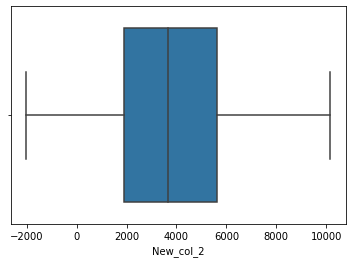

In [252]:
sns.boxplot(x_test_new['New_col_2'])

In [253]:
x_test = x_test_new.drop(['Loan_Status'], axis=1)
y_test = x_test_new['Loan_Status']

In [254]:
#x_test.drop(['Gender', 'Married','Dependents','Education', 'Self_Employed', 'Property_Area', 'ApplicantIncome', 'New_col', 'New_col_1', 'New_col_2'], axis=1, inplace=True)

In [256]:
x_train.head()

,Credit_History,Loan_Amount_Term
26,1,360.0
394,1,360.0
86,1,360.0
136,1,360.0
45,1,360.0


In [259]:
x_test.head()

,Credit_History,Loan_Amount_Term
182,1,180.0
440,1,360.0
276,1,360.0
504,1,300.0
300,0,360.0


In [262]:
for name,model in models.items():
    print(name)
    y_pred = model.predict(x_test)
    print('_'*20)
    measure_loss(y_test, y_pred)
    print('_'*20)

LogisticReg:
____________________
precision: 0.889 
recall: 0.485 
f1_scores: 0.627 
accuracy: 0.830 
loss: 5.859
____________________
RandomForestClassifier:
____________________
precision: 0.783 
recall: 0.545 
f1_scores: 0.643 
accuracy: 0.821 
loss: 6.168
____________________
KNN:
____________________
precision: 0.783 
recall: 0.545 
f1_scores: 0.643 
accuracy: 0.821 
loss: 6.168
____________________
SupportVectorMachine:
____________________
precision: 0.500 
recall: 0.091 
f1_scores: 0.154 
accuracy: 0.705 
loss: 10.177
____________________


### In conclusion:

#### we see that the knn, randomforest, and logistic reg, are the best model, now, we can also improve our model *recall* by using other complex model. If there is any mistake or a way of improvement please comment.

Thank You.